# Sea Level Predictor

#### The fifth project of the "[*Data Analysis with Python*](https://www.freecodecamp.org/learn/data-analysis-with-python/)" Certification.

#### A [freeCodeCamp.org](https://www.freecodecamp.org/) course

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### The Goal

The last project consists of analyzing a dataset of the global average sea level change since 1880. We will use the data to predict the sea level change through year 2050.

### Hands on!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv("epa-sea-level.csv")

### Basic exploration

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [4]:
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


### Scatter plot

The first step gonna be to drawing a scatter plot using the `Year` column as the x-axis and the `CSIRO Adjusted Sea Level` column as the y-axis.

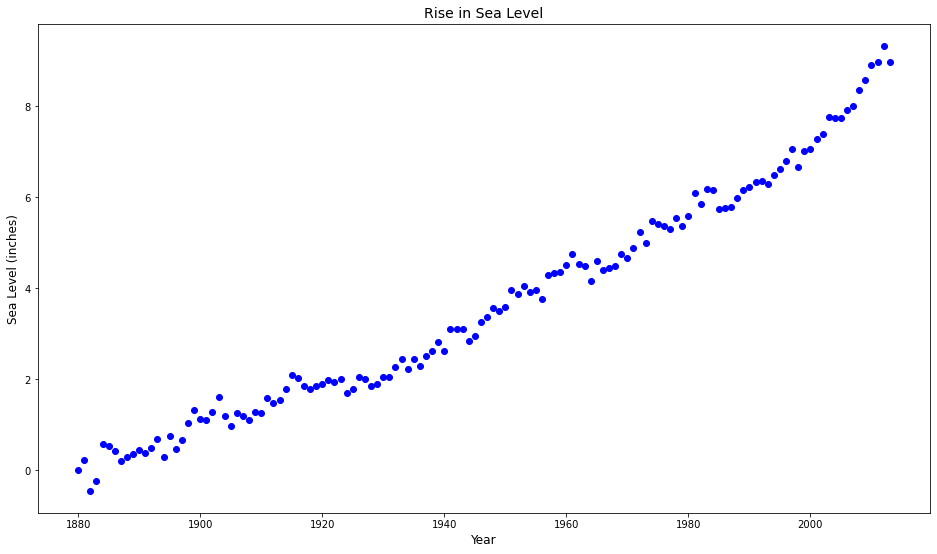

In [6]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.set_title("Rise in Sea Level", size = 14)
ax.set_xlabel("Year", size = 12)
ax.set_ylabel("Sea Level (inches)", size = 12)

plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], c ="blue")

plt.show()

### A bit of linear regression

Now, we use the `linregress` function from scipy.stats to get the slope and y-intercept of the line of best fit.

In [7]:
result = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
result

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)

With these values, we can 'predict' the sea level rise in 2050, we only have to apply the related affine function.

In [8]:
result.slope * 2050 + result.intercept

10.175455257136548

Even better, we can define that function:

In [9]:
def predict (year, slope = result.slope, intercept = result.intercept):
    return slope * year + intercept

predict(2050)

10.175455257136548

We gonna plot the line of best fit over the top of the scatter plot. We make the line go through the year 2050 to see the prediction of the sea level rise in that year.

The fist we have to do is enlarge our dataset until the year 2050.

In [10]:
future = pd.DataFrame(columns = df.columns)
future_years = [i for i in range(df['Year'].max() + 1, 2051)]
future['Year'] = future_years

df = pd.concat([df, future])

Now, we can draw the plot.

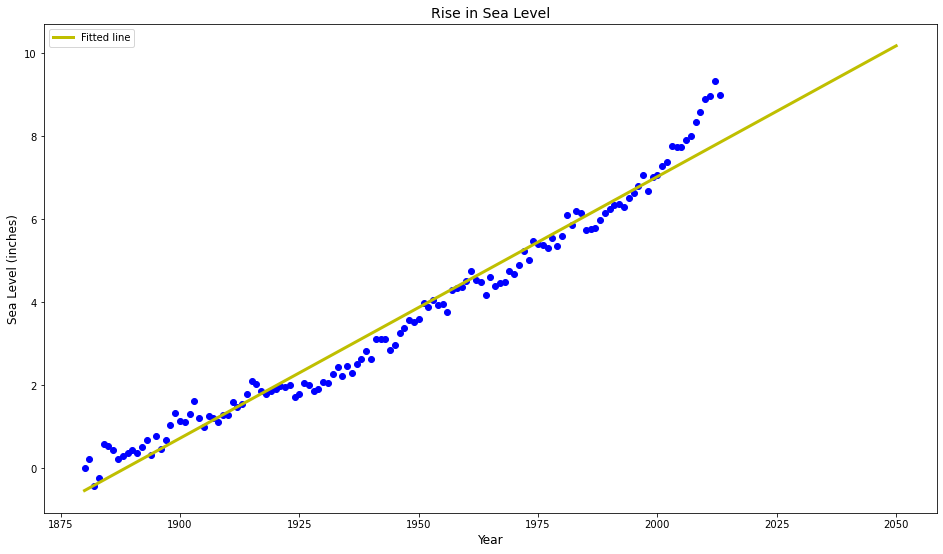

In [11]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.set_title("Rise in Sea Level", size = 14)
ax.set_xlabel("Year", size = 12)
ax.set_ylabel("Sea Level (inches)", size = 12)

plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], c ="blue")

plt.plot(df['Year'], predict(df['Year']), 'y', label = 'Fitted line', linewidth = 3)

plt.legend()
plt.show()

### Linear regression considering only the last years

We can notice in the last chart that the last years rise is significantly greater. Due to this fact, we gonna do the same we did in the previous step, but considering only the data since 2000.

In [12]:
years_bounded = (df["Year"] >= 2000) & (df["Year"] <= 2013)

result_since_2000 = linregress(df[years_bounded]['Year'], df[years_bounded]["CSIRO Adjusted Sea Level"])
result_since_2000

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)

In this case our prediction is obviously greater.

In [13]:
predict(2050, result_since_2000.slope, result_since_2000.intercept)

15.382443524364874

And finally, we can draw all together:

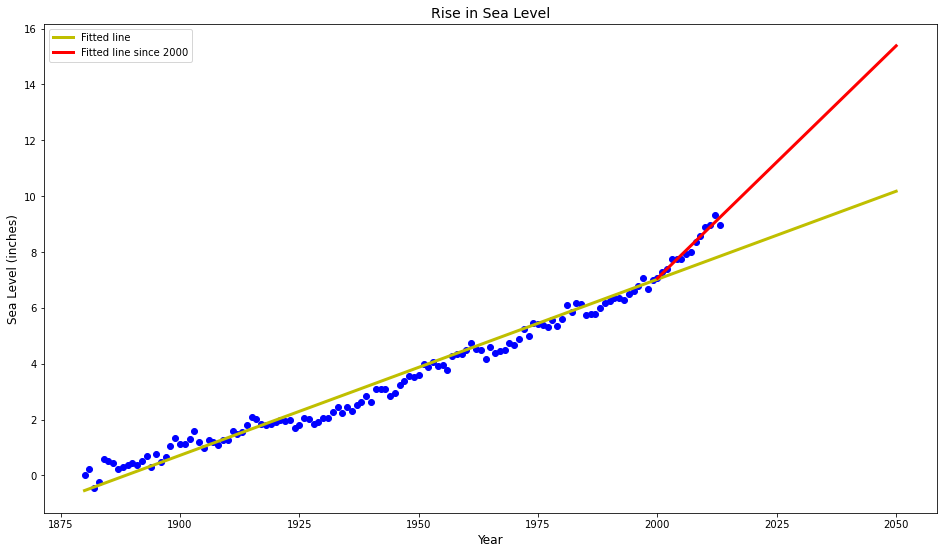

In [14]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.set_title("Rise in Sea Level", size = 14)
ax.set_xlabel("Year", size = 12)
ax.set_ylabel("Sea Level (inches)", size = 12)

plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], c ="blue")

plt.plot(df['Year'], predict(df['Year']), 'y', label = 'Fitted line', linewidth = 3)

years_since_2000 = (df["Year"] >= 2000)
plt.plot(df[years_since_2000]['Year'],
         predict(df[years_since_2000]['Year'], result_since_2000.slope, result_since_2000.intercept),
         'r', label = 'Fitted line since 2000', linewidth = 3)

plt.legend()
plt.show()

### Appendix

Now, we can submit the project using the following function:

In [15]:
def draw_plot():

    df = pd.read_csv("epa-sea-level.csv")

    fig, ax = plt.subplots(figsize=(16, 9))

    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], c ="blue")

    result = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])

    def predict (year, slope = result.slope, intercept = result.intercept):
      return slope * year + intercept

    future = pd.DataFrame(columns = df.columns)
    future_years = [i for i in range(df['Year'].max() + 1, 2051)]
    future['Year'] = future_years
    
    df = pd.concat([df, future])

    plt.plot(df['Year'], predict(df['Year']), 'y', label = 'Fitted line', linewidth = 3)

    years_bounded = (df["Year"] >= 2000) & (df["Year"] <= 2013)
    result_since_2000 = linregress(df[years_bounded]['Year'],
                                   df[years_bounded]["CSIRO Adjusted Sea Level"])

    years_since_2000 = (df["Year"] >= 2000)
    plt.plot(df[years_since_2000]['Year'],
         predict(df[years_since_2000]['Year'], result_since_2000.slope, result_since_2000.intercept),
         'r', label = 'Fitted line since 2000', linewidth = 3)


    
    ax.set_title("Rise in Sea Level", size = 14)
    ax.set_xlabel("Year", size = 12)
    ax.set_ylabel("Sea Level (inches)", size = 12)
  
    plt.legend()
    plt.show()

    
    plt.savefig('sea_level_plot.png')
    
    return plt.gca()